In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from minisom import MiniSom

%matplotlib inline

In [2]:
data_dir='./datasets/Mall_Customers.csv'
df=pd.read_csv(data_dir)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 特徵選擇

In [3]:
plt.style.use('fivethirtyeight')

### 年齡和消費分數的數據分佈

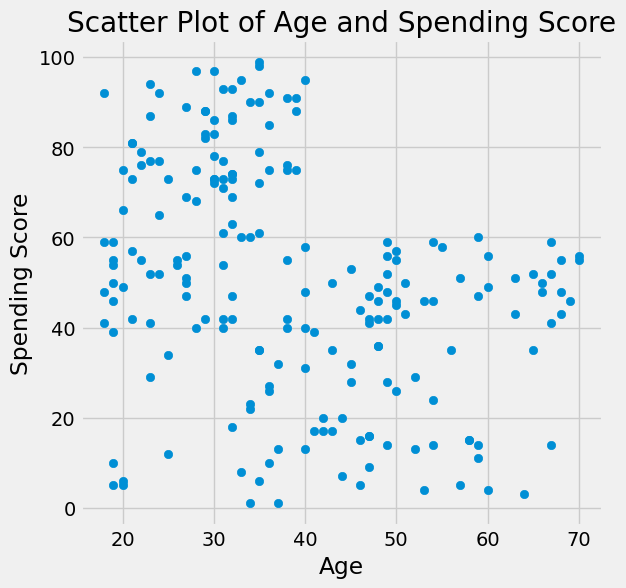

In [4]:
age=df['Age'].tolist()
spending_score=df['Spending Score (1-100)'].tolist()
fig=plt.figure(figsize=(6,6))
plt.scatter(age,spending_score)
plt.title("Scatter Plot of Age and Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

### 年齡和實際收入的數據分佈

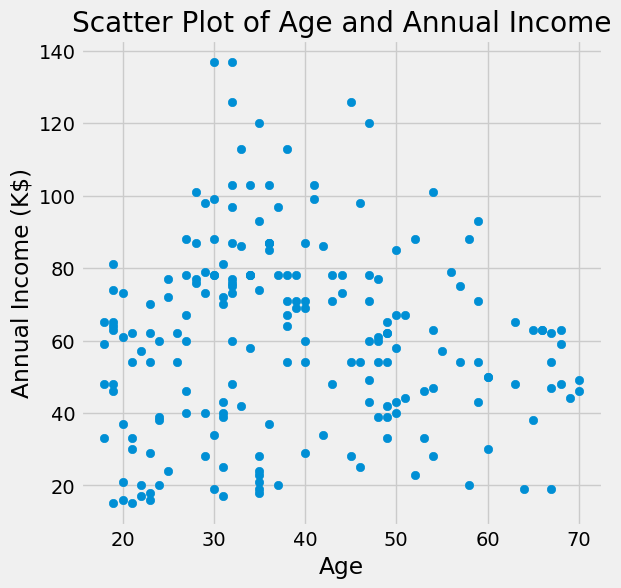

In [5]:
age=df['Age'].tolist()
annual_income=df['Annual Income (k$)'].tolist()
fig=plt.figure(figsize=(6,6))
plt.scatter(age,annual_income)
plt.title("Scatter Plot of Age and Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (K$)")
plt.show()

### 實際收入和消費分數的分佈

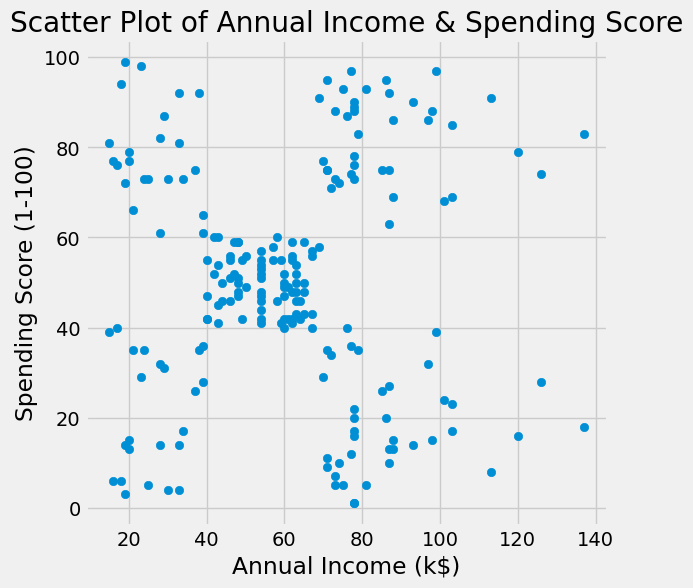

In [6]:
annual_income=df['Annual Income (k$)'].tolist()
spending_score=df['Spending Score (1-100)'].tolist()
fig=plt.figure(figsize=(6,6))
plt.scatter(annual_income,spending_score)
plt.title("Scatter Plot of Annual Income & Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

## 清理和轉換資料

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#選擇Annual Income (k$)欄位跟Spending Score (1-100)欄位當作特徵
features=df[['Annual Income (k$)','Spending Score (1-100)']]

#轉換特徵為列表
data=features.values
data.shape

(200, 2)

## 訓練 SOM

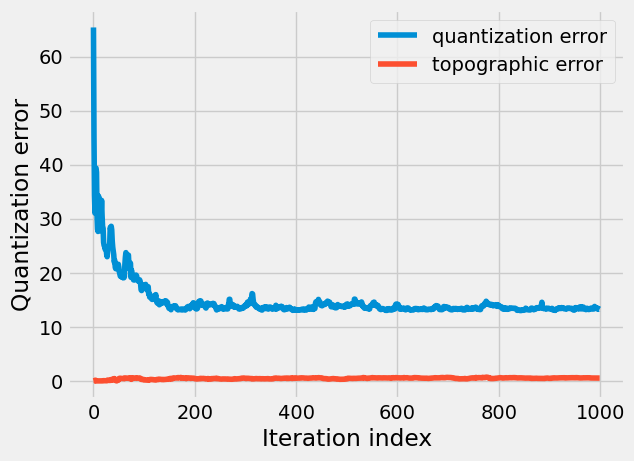

In [9]:
som_shape=(1,5)

som=MiniSom(som_shape[0],som_shape[1],data.shape[1],sigma=0.5,learning_rate=0.5)

max_iter=1000
q_error=[]
t_error=[]

for i in range(max_iter):
    rand_i=np.random.randint(len(data))
    som.update(data[rand_i],som.winner(data[rand_i]),i,max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter),q_error,label='quantization error')
plt.plot(np.arange(max_iter),t_error,label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

## 把結果畫出來

Text(0, 0.5, 'Spending Score (1-100)')

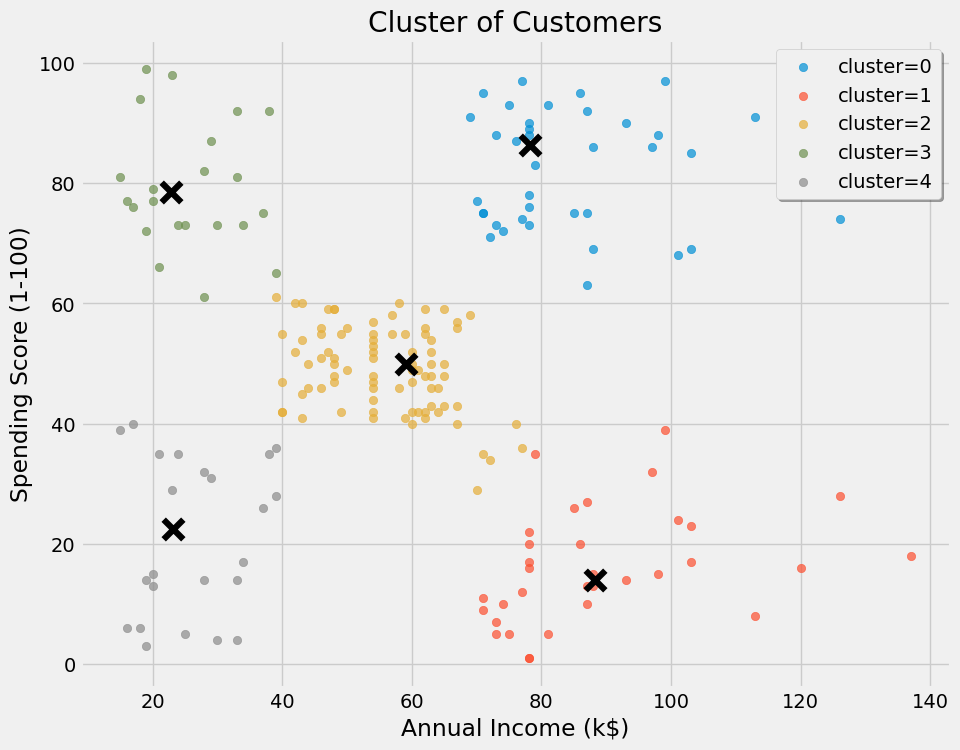

In [10]:
#每個神經元代表一個cluster
winner_coordinates=np.array([som.winner(x) for x in data]).T

#使用np.ravel_multi_index轉換為2維
cluster_index=np.ravel_multi_index(winner_coordinates,som_shape)

#畫clusters
plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c,0],
                data[cluster_index == c,1],label='cluster='+str(c),alpha=.7)

#畫centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:,0],centroid[:,1],marker='x',
                s=10,linewidths=20,color='k')

plt.legend(loc='upper right',shadow=True)
plt.title("Cluster of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

## 根據上圖的結果

### Cluster 0:高收入低消費
### Cluster 1:高收入高消費
### Cluster 2:低收入高消費
### Cluster 3:中等收入中等消費
### Cluster 4:低收入低消費